# Chapter 3 Exercises

## Set Up

In [4]:
# file paths
data_root = "https://raw.githubusercontent.com/kmerkl22/k-s-ISL/main/Data/"
image_root = "https://github.com/kmerkl22/k-s-ISL/raw/main/Images/"

In [21]:
# imports
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Problem 8

This question involves the use of simple linear regression on the Auto
data set.

### Part a
Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
1.   Is there a relationship between the predictor and the response?
2.   How strong is the relationship between the predictor and
the response?
3.   Is the relationship between the predictor and the response
positive or negative?
4.   What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confdence and prediction
intervals?

In [6]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [7]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [8]:
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [10]:
design = MS(['horsepower'])
design = design.fit(Auto)
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [11]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [12]:
#95% confidence interval
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [13]:
39.9359	+ -0.1578*98

24.4715

In [14]:
#prediction interval - wider?
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### Part b
Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [15]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [16]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

AttributeError: 'DataFrame' object has no attribute '_convert'

### Part c
Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

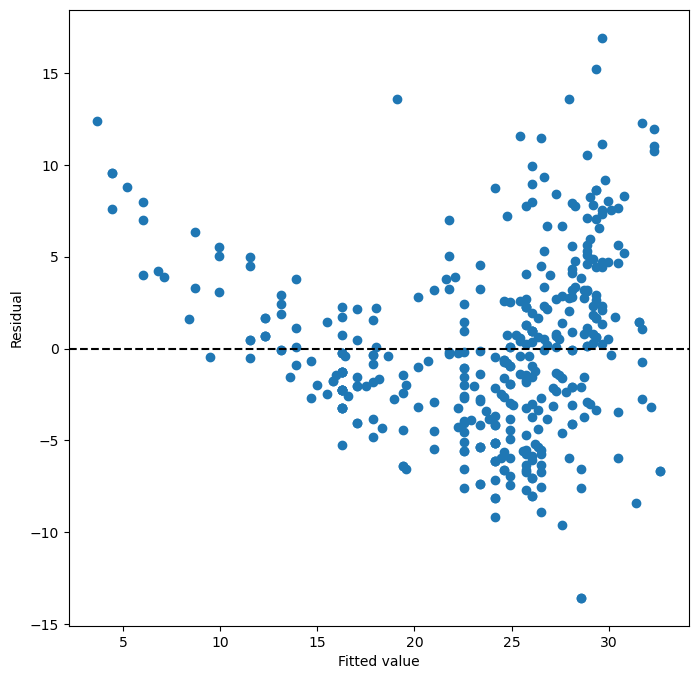

In [17]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

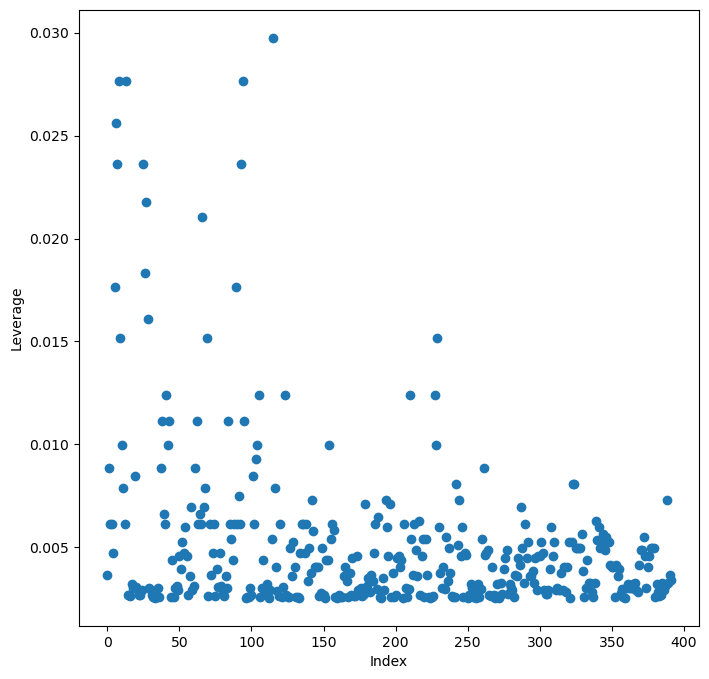

In [18]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Problem 10

In [19]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### Part a
Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [27]:
X = MS(['Price', 'Urban']).fit_transform(Carseats)
y = Carseats['Sales']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.6215,0.655,20.789,0.000
Price,-0.0531,0.005,-9.895,0.000
Urban[Yes],0.0341,0.278,0.123,0.903


In [28]:
terms = Carseats.columns.drop('Sales')
terms

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [29]:
X = MS(terms).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


In [30]:
just3 = Carseats.columns.drop(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Education'])
just3

Index(['Age', 'Urban', 'US'], dtype='object')

In [31]:
X = MS(just3).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,9.0523,0.534,16.947,0.00
Age,-0.0406,0.008,-4.846,0.00
Urban[Yes],-0.1067,0.298,-0.359,0.72
US[Yes],1.0605,0.283,3.741,0.00


### Part b
Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

               I guess people buying these car seats are more likely to be American and not live in a city. Not really sure what the age coefficient might mean. 

### Part c
Write out the model in equation form, being careful to handle the qualitative variables properly.